# Ocean Bathymetry: Mapping and Measuring

In [ ]:
# Imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cmocean
# from scipy.interpolate import RegularGridInterpolator

In [2]:
# Lists for storing measurements
labels = []
x_data = []
y_data = []
d_data = [] # what we read off the ruler (not actually d)

# Read measurement data from file
with open('data.csv', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=' ')
    next(datareader, None)  # skip the headers

    # Loop through rows
    for row in datareader:
        row = [r for r in row if r] # remove any empty strings
        
        # Store measurement labels to list
        labels.append(row[0])
        # Store x and y coordinates
        x_data.append(int(row[1]))
        y_data.append(int(row[2]))
        # Store measurements
        d_data.append(float(row[3]))

x_data = np.array(x_data)
y_data = np.array(y_data)
d_data = np.array(d_data)

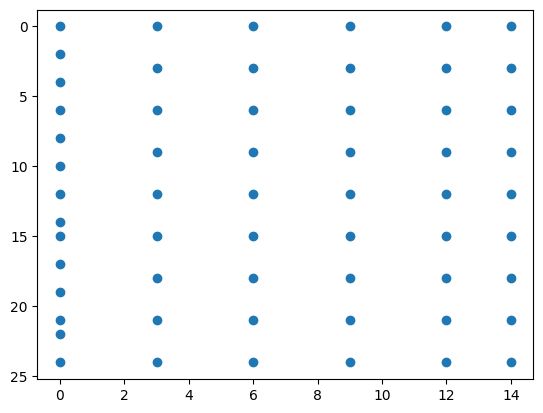

In [3]:
# Simple scatter plot of the measured points
# DONE: flip so that origin point is at top left

plt.scatter(x=x_data, y=y_data)
plt.gca().invert_yaxis()

plt.show()

In [4]:
# DONE:calulate the coordinates for each point (lon, lat)
lon_1, lat_1 =  -14.874, 9.937
lon_2, lat_2 =   -8.892, 0.005

def calculate_coordinates(x,y):
    lon = lon_1 + (lon_2 - lon_1)*(x/max(x_data))
    lat = lat_1 + (lat_2-lat_1)*(y/max(y_data))
    return lon,lat

lon_data,lat_data = calculate_coordinates(x_data,y_data)

# plt.gca().invert_yaxis()

# DONE: calculate the depth function, add the scale and h variables
stick_length = 14.3 # cm (accounted for blank part of the ruler)
s_ocean = 104375
h = 8 # cm
# scale = 1
# h = 0
# def depth(d):
    # return h+scale*d #unsure about this

# Get depth measurements from stick length measurments
d = stick_length - d_data - h   # cm

# Calculate true depth (m)
d_true = d*s_ocean / 100

d_true

array([1983.125, 1148.125,  313.125,  313.125,  313.125, 2296.25 ,
       3235.625, 3340.   , 3548.75 ,  521.875,  521.875,  626.25 ,
       4592.5  ,  835.   , 3131.25 , 1252.5  ,  521.875,  835.   ,
       3444.375, 3340.   ,  313.125, 1774.375, 1461.25 , 1565.625,
       2087.5  , 2296.25 , 3235.625, 3444.375,  521.875,  417.5  ,
       1461.25 , 3235.625,  626.25 ,  208.75 ,  208.75 ,  208.75 ,
       3131.25 , 2922.5  ,  835.   , 2191.875, 1565.625, 1565.625,
       2191.875, 2400.625, 2191.875,  208.75 ,  104.375,  104.375,
        104.375,  208.75 ,  313.125,  104.375,  104.375,  104.375,
        208.75 ,  313.125,  208.75 , 1983.125, 1670.   ])

# Plot geographic area and measurements

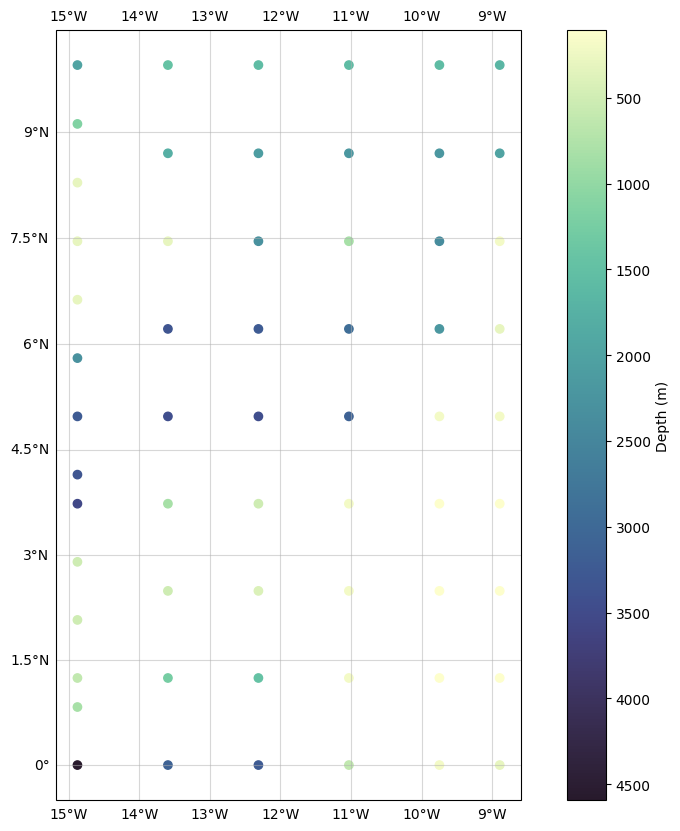

(-14.874, 9.937)

In [5]:
# Define geographic extent
min_lon, max_lon = lon_2, lon_1
min_lat, max_lat = lat_2, lat_1

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.Mercator()})

# Set the extent
# ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
# ax.set_extent([-180, 180, -45, 45], crs=ccrs.PlateCarree())

# Plot measurements
points = plt.scatter(x=lon_data, y=lat_data, c=d_true, transform=ccrs.PlateCarree(), cmap=cmocean.cm.deep)

# Show coast
# ax.coastlines(resolution='50m')

# Fig settings
gl = ax.gridlines(draw_labels=True, alpha=0.5)
gl.top_labels = True
gl.right_labels = False
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.legend()

# Add a colour bar
cbar = plt.colorbar(points)
cbar.set_label('Depth (m)')
cbar.ax.invert_yaxis()

plt.show()
lon_1, lat_1



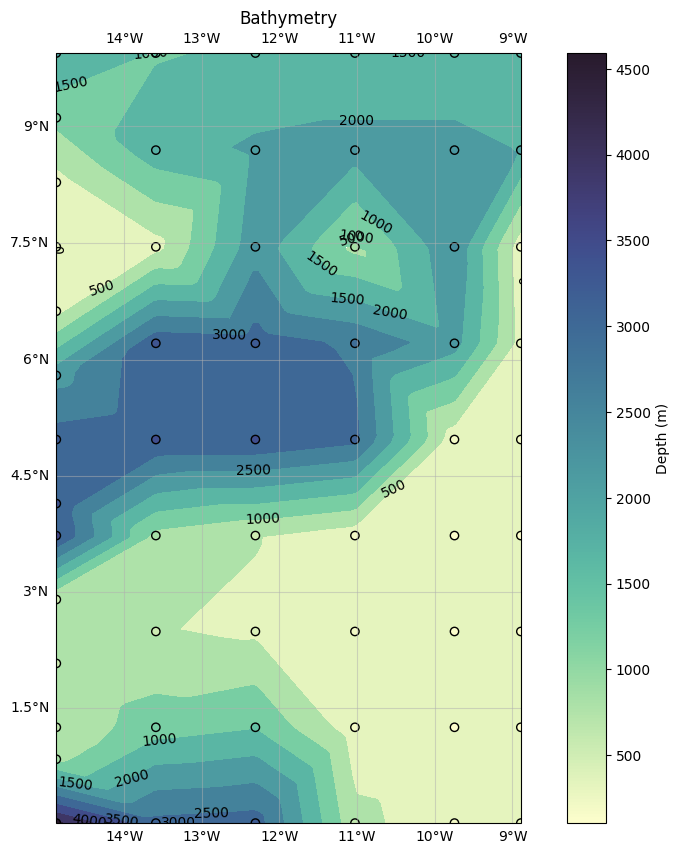

In [10]:
from scipy.interpolate import griddata

# Make a regular grid covering the same domain
xi = np.linspace(lon_data.min(), lon_data.max(), 100)  # choose resolution
yi = np.linspace(lat_data.min(), lat_data.max(), 100)
XI, YI = np.meshgrid(xi, yi)

# Interpolate onto the grid
DI = griddata(
    points=(lon_data, lat_data),
    values=d_true,
    xi=(XI, YI),
    method='linear'   # 'nearest', 'cubic' also possible
)

# Plot to check
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.Mercator()})

# plt.figure(figsize=(6,5))
# mesh = plt.pcolormesh(XI, YI, DI, shading='auto', transform=ccrs.PlateCarree(), cmap=cmocean.cm.deep)
CS = plt.contourf(XI, YI, DI, transform=ccrs.PlateCarree(), cmap=cmocean.cm.deep, levels=np.linspace(0, 5000, 11))
plt.scatter(lon_data, lat_data, c=d_true, edgecolor='k', transform=ccrs.PlateCarree(), cmap=cmocean.cm.deep)
plt.clabel(CS, fontsize=10, colors='black')

# Fig settings
gl = ax.gridlines(draw_labels=True, alpha=0.5)
gl.top_labels = True
gl.right_labels = False
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.legend()


plt.colorbar(label='Depth (m)')
plt.title("Bathymetry")
plt.show()